# Basic data visualization with python

Python has many popular and extensively used packages that focus exclusively on data visualization. For our purposes we can split them into two big classes:

1. Static visualizations
2. Interactive visualizations

We refer to interactive visualizations as those that can be served as a mobile app, a webpage, a static HTML file, that somehow renders a data visualization. The end users are able to interact with the rendered visualizations thanks to a mix of mostly javascript and in some cases also AJAX. There are many python packages that render the responsive and interactive HTML files, web apps, etc, with all the javascript necessary without much intervention. Some notable examples of these packages are [Bokeh](https://bokeh.pydata.org/en/latest/), [Plotly](https://plot.ly/python/), [Holoviews](http://holoviews.org/), and [Altair](https://altair-viz.github.io/).

To make things easier for us, we will focus on static visualizations. Many if not all static visualization packages for python rely heavily on [Matplotlib](https://matplotlib.org/) and its infrastructure. We will briefly introduce the key building blocks needed from matplotlib and then will turn to [seaborn](https://seaborn.pydata.org/), a package that provides some nice additions on top of Matplotlib to help visualize statistical data.

## What does Matplotlib do?

Matplotlib is a HUGE package. We usually interact with the high level `pyplot` (or `pylab`) module that follows a similar functional pattern as MATLAB.

`pyplot` allows us to create figures, place axes inside it, draw things inside the axes (lines, images, text), annotate the axes with labels, legends, titles, and then matplotlib renders the entire figure for the final visualization. The parts of a figure are the following:

<img src="images/anatomy.png">

To create a figure and add some axes into it we can follow many protocols, but we usually just do one of the following:

In [1]:
# We use this magic to make matplotlib render its figures inline the notebook's cell
%matplotlib inline

from matplotlib import pyplot as plt

fig = plt.figure()

<Figure size 432x288 with 0 Axes>

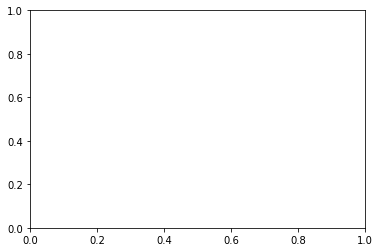

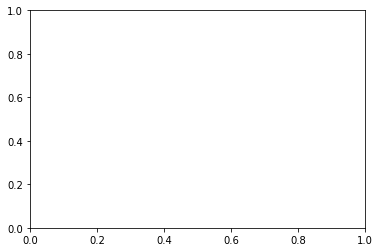

In [2]:
# Create a new axes in the current figure. If no figure exists, it creates a new one
plt.axes()
# Create a new figure
plt.figure()
# Create a new axes in the current figure
plt.axes()

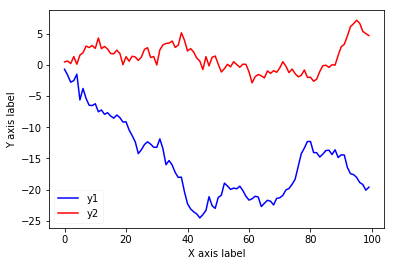

In [3]:
# We can then add content into the axes in two main ways:
import numpy as np
x = np.arange(100)
y1 = np.cumsum(np.random.randn(100))
y2 = np.cumsum(np.random.randn(100))

ax = plt.axes()
# Use pyplot to plot to the current axes (you can get the axes instance with plt.gca())
plt.plot(x, y1, color='blue')
# Use the axes object oriented methods to add plots
ax.plot(x, y2, color='red')
# We can also add annotations in these two ways
plt.xlabel('X axis label')
# Be aware that ylabel is a property of the Axes instance,
# so you need to work with the set_* and get_* methods instead
ax.set_ylabel('Y axis label')

plt.legend(['y1', 'y2'], loc='best', framealpha=0.2)

Shape of axs array = (3, 2)


Text(0.5, 1.0, 'The second column')

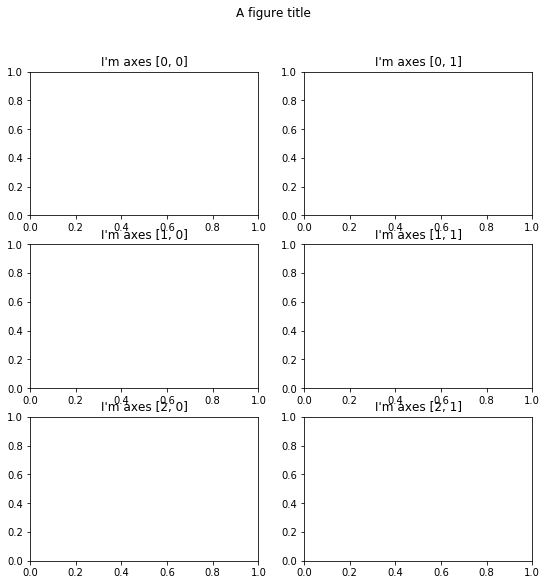

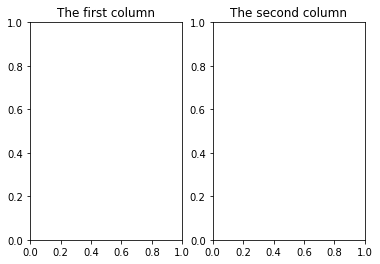

In [4]:
# If one wants to build a grid of many axes inside the same figure
# one can use plt.GridSpec or the easier subplot and subplots
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(9, 9))
fig.suptitle('A figure title')
# axs is an array of axes instances where one can add content
print('Shape of axs array = {}'.format(axs.shape))

for row, row_axs in enumerate(axs):
    for col, ax in enumerate(row_axs):
        ax.set_title("I'm axes [{}, {}]".format(row, col))

# Now using the more primitive subplot (without the trailing s)
plt.figure()
plt.subplot(1, 2, 1)
plt.title('The first column')
plt.subplot(122)
plt.title('The second column')

(3, 2)


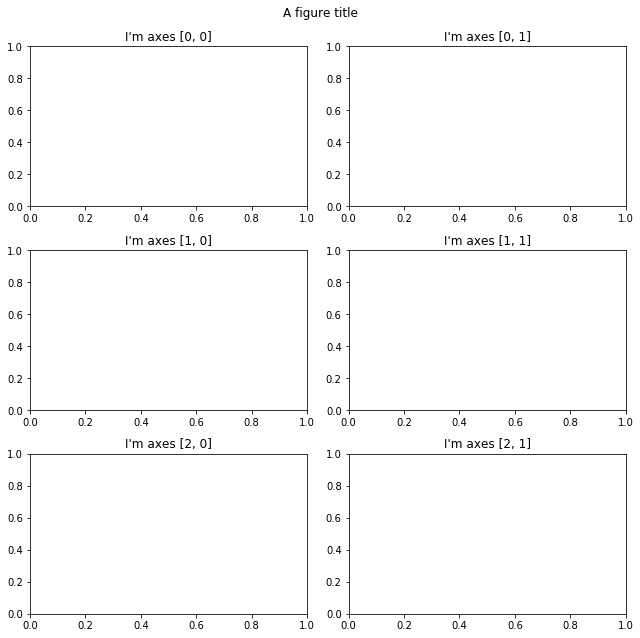

In [5]:
# But the above examples looks horrible, some axes titles overlap with
# axes labels, how can we adjust this?
# The easiest way is using the tight_layout method
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(9, 9))
fig.suptitle('A figure title')
# axs is an array of axes instances where one can add content
print(axs.shape)

for row, row_axs in enumerate(axs):
    for col, ax in enumerate(row_axs):
        ax.set_title("I'm axes [{}, {}]".format(row, col))
plt.tight_layout(rect=[0, 0, 1, 0.96]) # We could also use fig.tight_layout

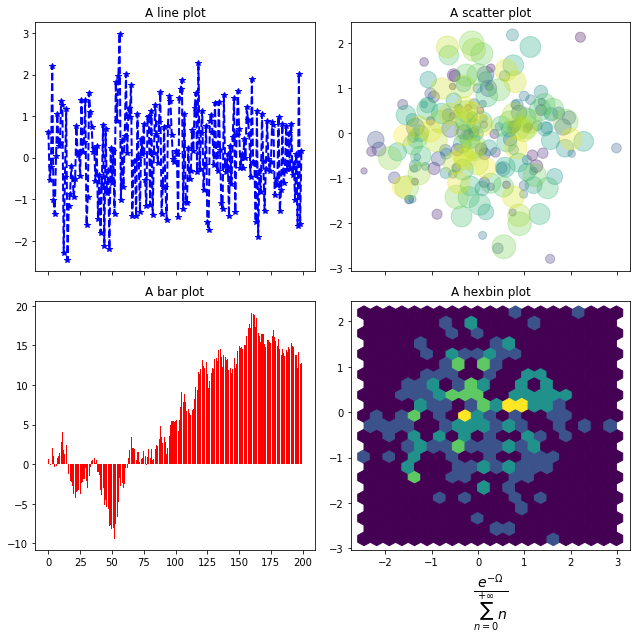

In [6]:
n = 200
x = np.arange(n)
y1 = np.random.randn(n)
y2 = np.random.randn(n)
y3 = np.cumsum(y1)

fig, axs = plt.subplots(2, 2, sharex='col', figsize=(9, 9))

axs[0, 0].plot(x, y1, color='b', linewidth=2, linestyle='--',
               marker='*')
axs[0, 0].set_title('A line plot')

axs[1, 0].bar(x, y3, color='r')
axs[1, 0].set_title('A bar plot')

axs[0, 1].scatter(y1, y2, s=np.abs(y3) * 30 + 40, c=x/np.max(x),
                  cmap='viridis', alpha=0.3)
axs[0, 1].set_title('A scatter plot')

axs[1, 1].hexbin(y1, y2, gridsize=20)
axs[1, 1].set_title('A hexbin plot')
# We can add latex math in any text object
axs[1, 1].set_xlabel(r'$\frac{e^{-\Omega}}{\sum_{n = 0}^{+\infty}n}$',
                     fontsize=20)
fig.tight_layout()

Matplotlib is really powerfull and has many useful low-level builtin visualization functions. It is encouraged to look at the [pyplot reference sheet](https://matplotlib.org/api/pyplot_summary.html) and some [matplotlib tutorials](https://matplotlib.org/tutorials/index.html) to learn other things that can be done.

Now that you've seen that we can do many many different things with the low level matplotlib, **what does [seaborn](https://seaborn.pydata.org/) help us to do?** It's built on top of matplotlib and uses all the things we saw above: figures, axes, artists, grids (actually it inherits from matplotlib's classes).

In [7]:
import pandas as pd
import seaborn as sns

# We'll first load some test datasets from seaborn to practice
df = sns.load_dataset('car_crashes')
df.head(4)

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR


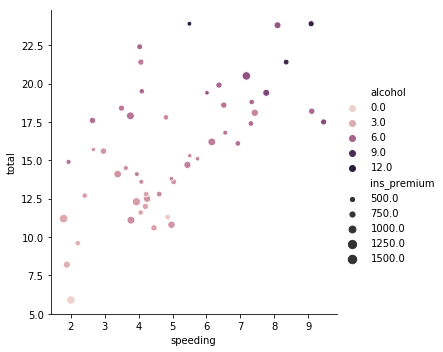

In [8]:
# Seaborn is aware of pandas DataFrames and Series, and integrates well with them
# We can pass column names and a Dataframe
sns.relplot(x='speeding', y='total', hue='alcohol', size='ins_premium', data=df)
# Notice also that seaborn automatically handled digitizing alcohol and ins_premium for us

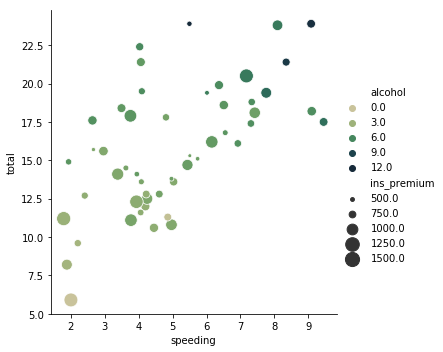

In [9]:
# Seaborn also uses nice cubehelix methods to get colormaps that
# are both expressive in brightness and color
sns.relplot(x='speeding', y='total', hue='alcohol',
            size='ins_premium', data=df,
            palette="ch:r=-.7,l=.75",
            sizes=(15, 200)
           )
# Notice also that seaborn automatically handled digitizing alcohol and ins_premium for us

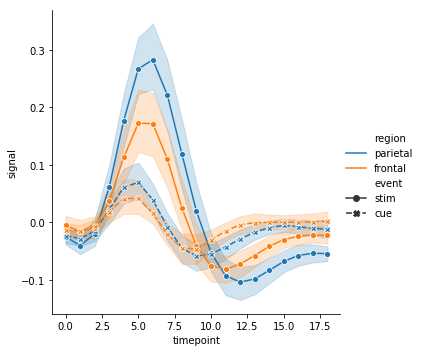

In [10]:
# All of these plots used the scatter kind, we'll show the line kind with another dataset
fmri = sns.load_dataset("fmri")
sns.relplot(x="timepoint", y="signal", hue="region", style="event",
            dashes=True, markers=True, kind="line", data=fmri);

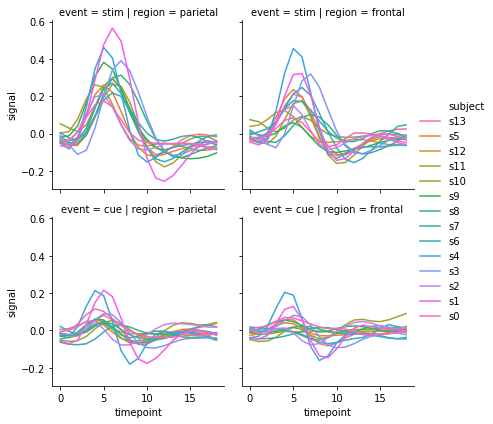

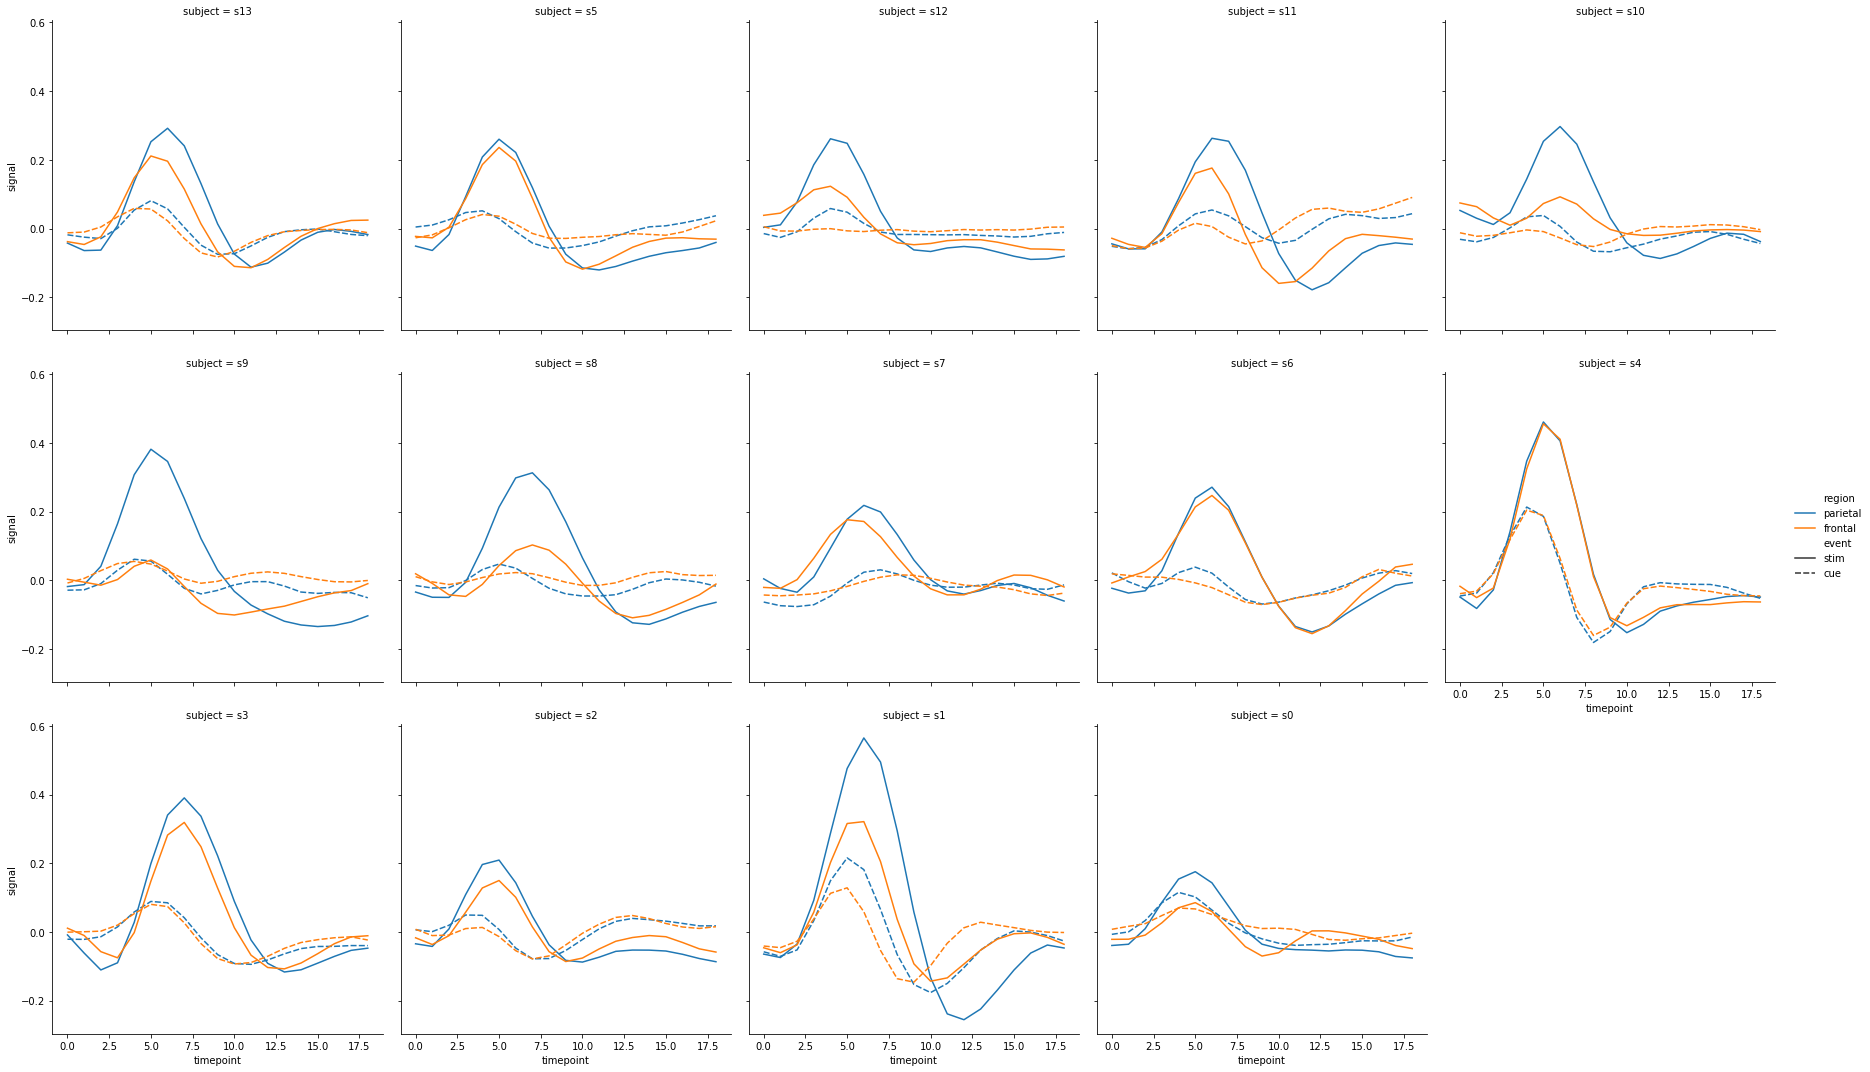

In [11]:
# Seaborn can even construct multiple axes instances placed
# on a grid (they call it FacetGrid) based on features of
# the dataset automatically
sns.relplot(x="timepoint", y="signal", hue="subject",
            col="region", row="event", height=3,
            kind="line", estimator=None, data=fmri);

sns.relplot(x="timepoint", y="signal", hue="region",
            style="event",
            col="subject", col_wrap=5,
            kind="line", estimator=None, data=fmri);

Seaborn has many more capabilities that help in plotting [categorical data](https://seaborn.pydata.org/tutorial/categorical.html), [regressions](https://seaborn.pydata.org/tutorial/regression.html), amongst many others, but we will finish looking at what we can do to visualize distributions (or more accurately, samples of probabliity distributions)

In [12]:
help(sns.distplot)

Help on function distplot in module seaborn.distributions:

distplot(a, bins=None, hist=True, kde=True, rug=False, fit=None, hist_kws=None, kde_kws=None, rug_kws=None, fit_kws=None, color=None, vertical=False, norm_hist=False, axlabel=None, label=None, ax=None)
    Flexibly plot a univariate distribution of observations.
    
    This function combines the matplotlib ``hist`` function (with automatic
    calculation of a good default bin size) with the seaborn :func:`kdeplot`
    and :func:`rugplot` functions. It can also fit ``scipy.stats``
    distributions and plot the estimated PDF over the data.
    
    Parameters
    ----------
    
    a : Series, 1d-array, or list.
        Observed data. If this is a Series object with a ``name`` attribute,
        the name will be used to label the data axis.
    bins : argument for matplotlib hist(), or None, optional
        Specification of hist bins, or None to use Freedman-Diaconis rule.
    hist : bool, optional
        Whether to plot 

In [13]:
help(sns.jointplot)

Help on function jointplot in module seaborn.axisgrid:

jointplot(x, y, data=None, kind='scatter', stat_func=None, color=None, height=6, ratio=5, space=0.2, dropna=True, xlim=None, ylim=None, joint_kws=None, marginal_kws=None, annot_kws=None, **kwargs)
    Draw a plot of two variables with bivariate and univariate graphs.
    
    This function provides a convenient interface to the :class:`JointGrid`
    class, with several canned plot kinds. This is intended to be a fairly
    lightweight wrapper; if you need more flexibility, you should use
    :class:`JointGrid` directly.
    
    Parameters
    ----------
    x, y : strings or vectors
        Data or names of variables in ``data``.
    data : DataFrame, optional
        DataFrame when ``x`` and ``y`` are variable names.
    kind : { "scatter" | "reg" | "resid" | "kde" | "hex" }, optional
        Kind of plot to draw.
    stat_func : callable or None, optional
        *Deprecated*
    color : matplotlib color, optional
        Colo

In [14]:
help(sns.pairplot)

Help on function pairplot in module seaborn.axisgrid:

pairplot(data, hue=None, hue_order=None, palette=None, vars=None, x_vars=None, y_vars=None, kind='scatter', diag_kind='auto', markers=None, height=2.5, aspect=1, dropna=True, plot_kws=None, diag_kws=None, grid_kws=None, size=None)
    Plot pairwise relationships in a dataset.
    
    By default, this function will create a grid of Axes such that each
    variable in ``data`` will by shared in the y-axis across a single row and
    in the x-axis across a single column. The diagonal Axes are treated
    differently, drawing a plot to show the univariate distribution of the data
    for the variable in that column.
    
    It is also possible to show a subset of variables or plot different
    variables on the rows and columns.
    
    This is a high-level interface for :class:`PairGrid` that is intended to
    make it easy to draw a few common styles. You should use :class:`PairGrid`
    directly if you need more flexibility.
    

In [15]:
df.columns

Index(['total', 'speeding', 'alcohol', 'not_distracted', 'no_previous',
       'ins_premium', 'ins_losses', 'abbrev'],
      dtype='object')

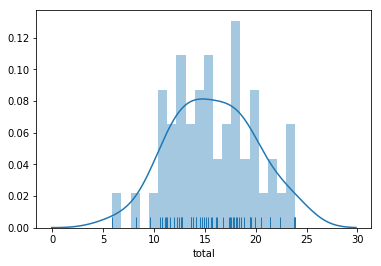

In [16]:
# Basic view of a single variable's distribution
sns.distplot(df.total,
             bins=20,  # Number of bins for the histogram
             kde=True,  # Plot the kernel density estimate of the data
             rug=True)  # Show ticks with the true values

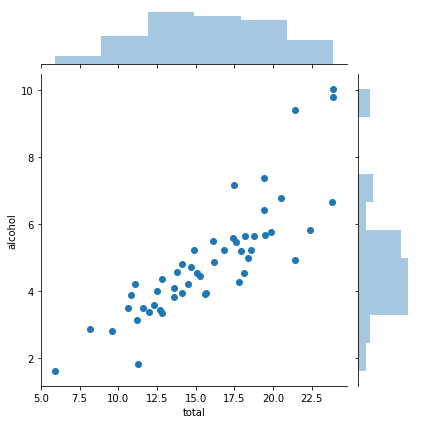

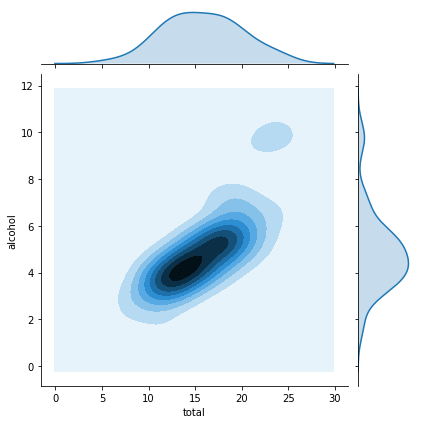

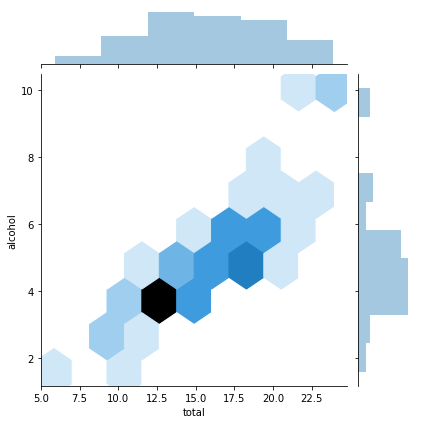

In [17]:
# View of the distribution of two variables

# First as a scatter plot with the marginal histograms
sns.jointplot(x='total', y='alcohol', data=df,
              kind='scatter')
# As a kde estimate
sns.jointplot(x='total', y='alcohol', data=df,
              kind='kde')
# As a hexbin histogram
sns.jointplot(x='total', y='alcohol', data=df,
              kind='hexbin')

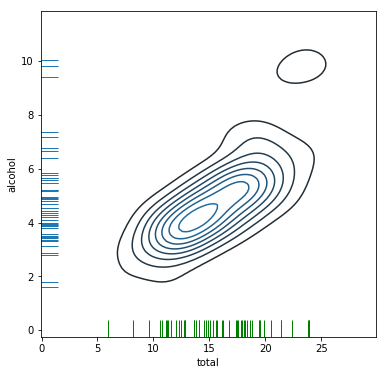

In [18]:
# This can also be done using matplotlib lowlevel constructs
f, ax = plt.subplots(figsize=(6, 6))
sns.kdeplot(df.total, df.alcohol, ax=ax)
sns.rugplot(df.total, color="g", ax=ax)
sns.rugplot(df.alcohol, vertical=True, ax=ax);

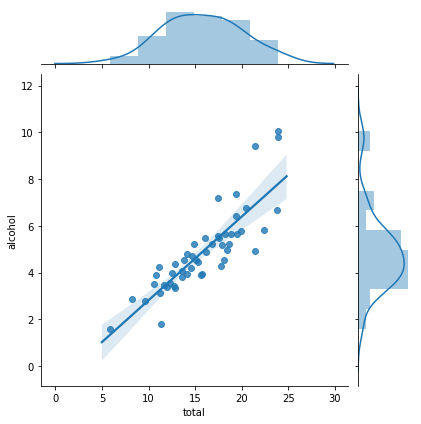

In [19]:
# One can also take advantage of the JointGrid that provides the axes layout
# and methods to plot to each axes
g = sns.JointGrid(x='total', y='alcohol', data=df)
g.plot_joint(sns.regplot)
g.plot_marginals(sns.distplot, kde=True)

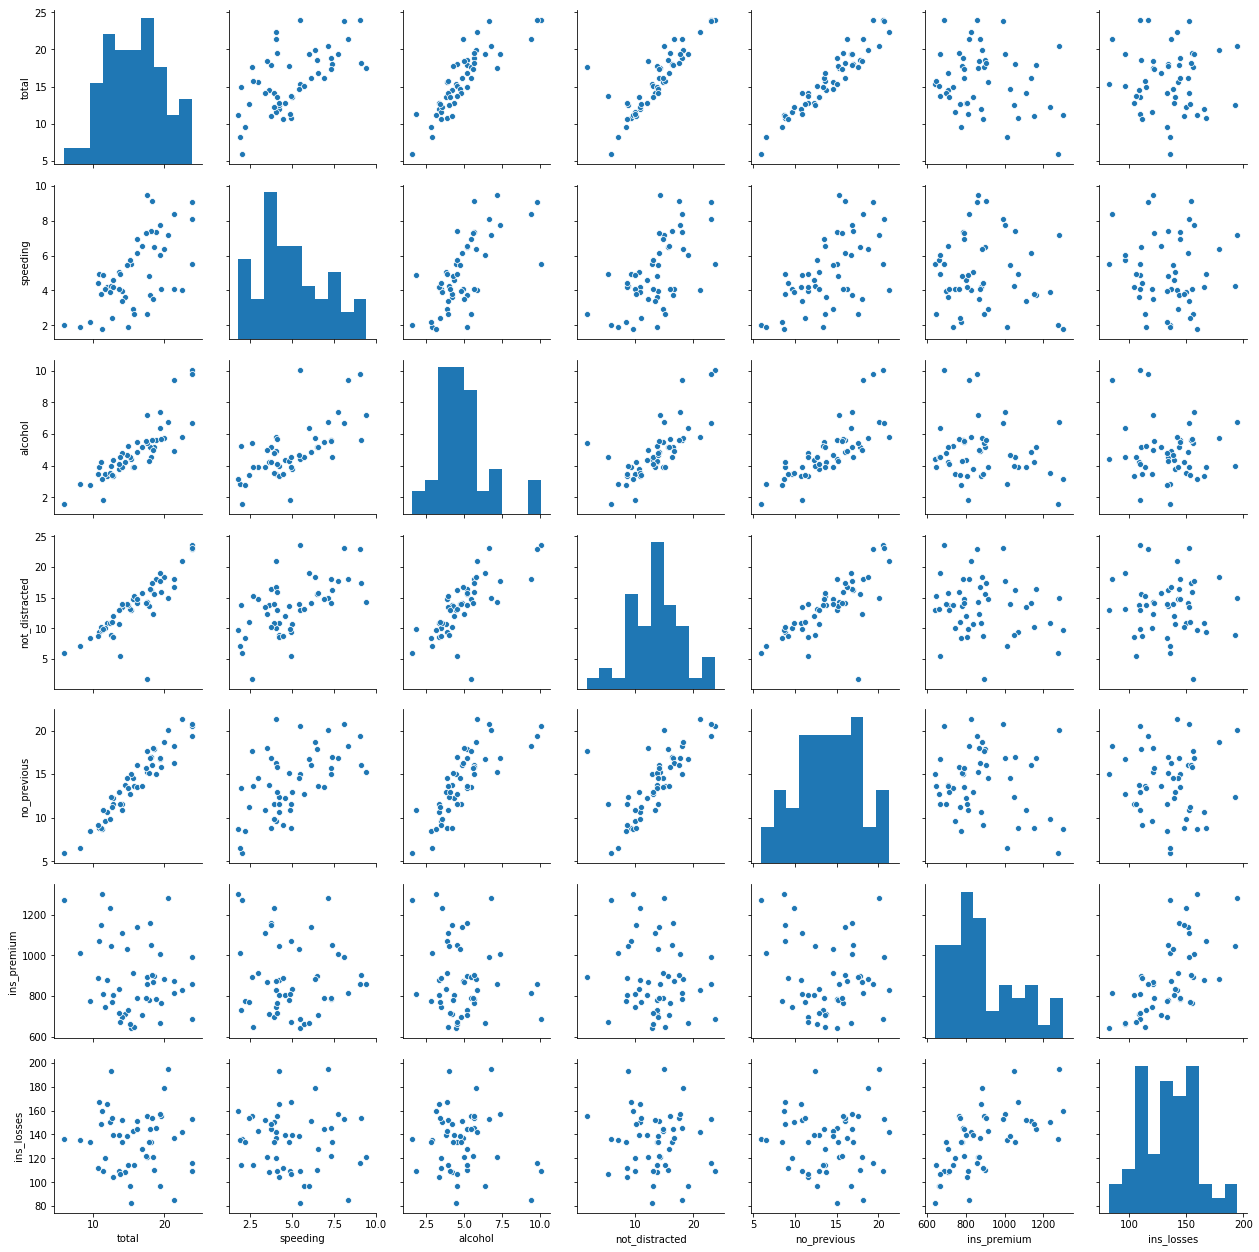

In [20]:
# Finally, one of the most powerful tools is the pairplot
# This allows fast exploration across many variables in a
# dataset
vs = [c for c in df.columns if c != 'abbrev']
sns.pairplot(data=df, vars=vs)

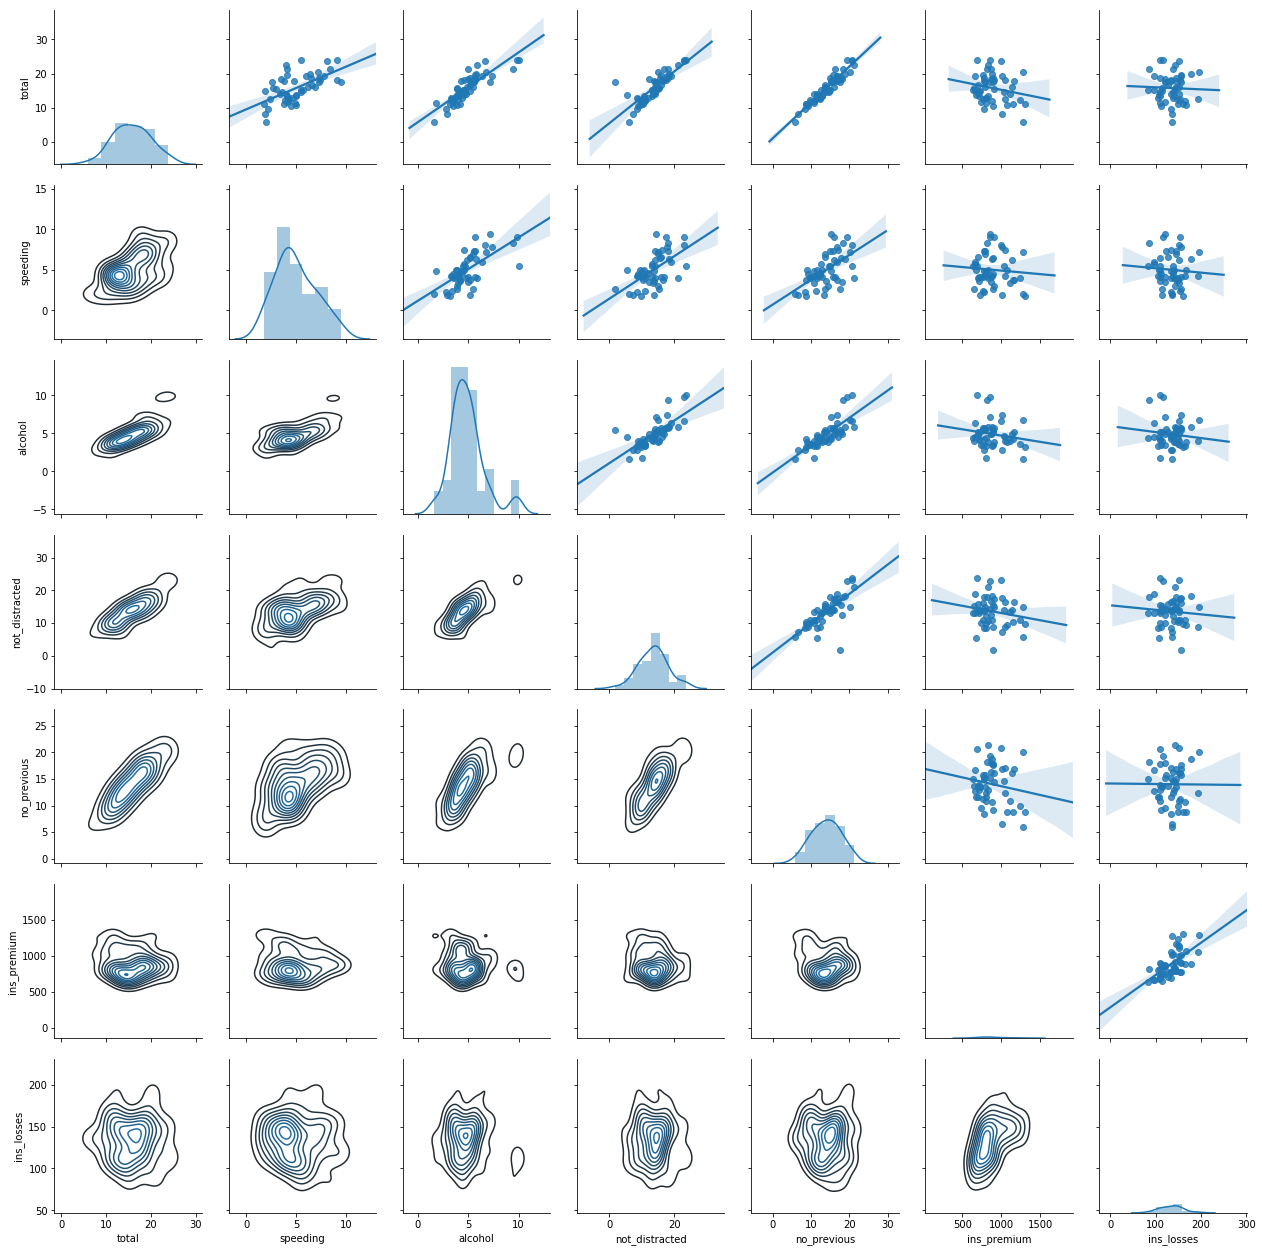

In [21]:
# Seaborn also provides PairGrid to get the axes layout and convinience
# access methods for diagonal and off diagonal plots
g = sns.PairGrid(data=df, vars=vs)
g.map_lower(sns.kdeplot)
g.map_diag(sns.distplot)
g.map_upper(sns.regplot)

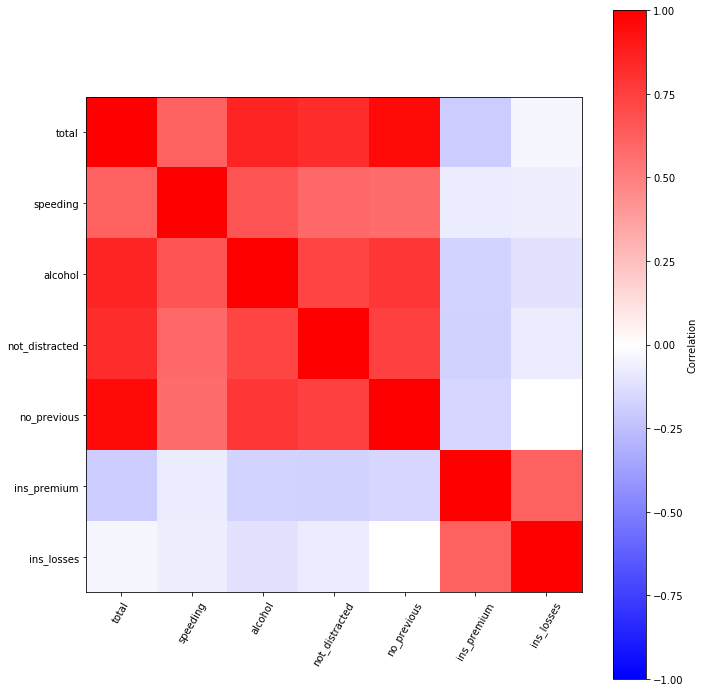

In [22]:
# One can always compare with a regular correlation matrix
# visualization done entirely with pyplot
plt.figure(figsize=(10, 10))
im = plt.imshow(df.drop(columns=['abbrev']).corr(),
                extent=[0, len(vs), 0, len(vs)],
                interpolation='nearest',
                cmap='bwr',
                vmin=-1,
                vmax=1
               )
plt.gca().set_xticks(0.5 + np.arange(len(vs)))
plt.gca().set_yticks(0.5 + np.arange(len(vs))[::-1])
plt.gca().set_xticklabels(vs, rotation=60)
plt.gca().set_yticklabels(vs)
cbar = plt.colorbar(im, ax=plt.gca())
cbar.set_label('Correlation')
plt.tight_layout()

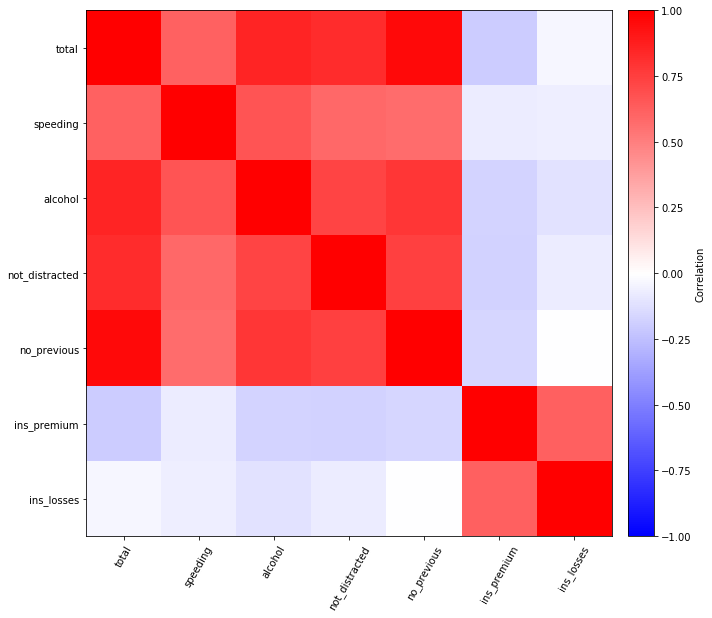

In [23]:
# The above colorbar gets rendered in an ugly way because of
# the particular way in which its axes is created. We can
# solve that issue in many ways:
# 1. https://matplotlib.org/users/tight_layout_guide.html for matplotlib 2.x
# 2. https://matplotlib.org/tutorials/intermediate/constrainedlayout_guide.html for matplotlib 3.x

# Given my matplotlib version I'll use number 1
plt.figure(figsize=(10, 10))
im = plt.imshow(df.drop(columns=['abbrev']).corr(),
                extent=[0, len(vs), 0, len(vs)],
                interpolation='nearest',
                cmap='bwr',
                vmin=-1,
                vmax=1
               )
ax = plt.gca()
ax.set_xticks(0.5 + np.arange(len(vs)))
ax.set_yticks(0.5 + np.arange(len(vs))[::-1])
ax.set_xticklabels(vs, rotation=60)
ax.set_yticklabels(vs)


from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "5%", pad="3%")
plt.colorbar(im, cax=cax)
cax.set_ylabel('Correlation')
plt.tight_layout()